## Análise e interpretação dos dados fornecidos para o projeto final

### Importando bibliotecas que serão usadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

### Leitura e visualização dos datasets

In [2]:
df1 = pd.read_csv('../data/estaticos_portfolio1.csv',index_col = 0)
df2 = pd.read_csv('../data/estaticos_portfolio2.csv',index_col = 0)
df3 = pd.read_csv('../data/estaticos_portfolio3.csv',index_col = 0)
mkt = pd.read_csv('../data/estaticos_market.csv',index_col = 0)
df2 = pd.merge(df2,mkt, on='id', how='inner')
df3 = pd.merge(df3,mkt, on='id', how='inner')

In [3]:
## numero de entradas
mkt.shape

(462298, 181)

In [4]:
## corpo do dataset
mkt.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Verificando o número de registros faltantes em cada feature

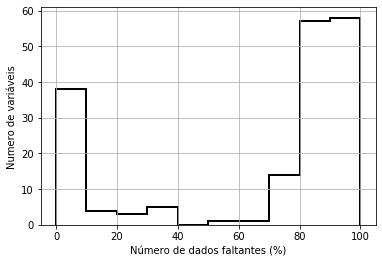

In [5]:
plt.hist(100*(mkt.isnull().sum(axis=0))/mkt.shape[0],bins = 10,histtype='step',color = 'black',linewidth = 2.)
plt.xlabel('Número de dados faltantes (%)')
plt.ylabel('Numero de variáveis')
plt.grid()

### Como primeiro passo, eliminarei as variáveis com 70% dos dados faltantes (não faz sentido trabalhar com um parâmetro que quase não possui estatística). Coloquei a porcentagem de corte como ajustável, logo podemos aumentar ou diminuir esse threshold.

In [6]:
threshold = 0.7   ## pegar colunas maior que 95%
nan_num   = (mkt.isnull().sum(axis = 0))/mkt.shape[0]  ## calculo da porcentagem de registros null para cada coluna
var_nans  = mkt.columns[nan_num>=threshold] ## pega nome das colunas maiores que a porcentagem definida
print('Variaveis que serão removidas total:'+str(var_nans.shape[0])+'\n ',var_nans)

Variaveis que serão removidas total:129
  Index(['vl_total_tancagem', 'vl_total_veiculos_antt',
       'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art',
       'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo',
       'vl_potenc_cons_oleo_gas', 'de_indicador_telefone', 'vl_frota',
       ...
       'min_meses_servicos_all', 'media_meses_servicos', 'max_meses_servicos',
       'min_meses_servicos', 'qt_funcionarios', 'qt_funcionarios_12meses',
       'qt_funcionarios_24meses', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'tx_rotatividade'],
      dtype='object', length=129)


### Removendo váriaveis 

In [7]:
mkt.drop(labels=var_nans,axis=1,inplace=True)    

In [8]:
## Database com features removidas
mkt.shape

(462298, 52)

### Analise dos registros faltantes

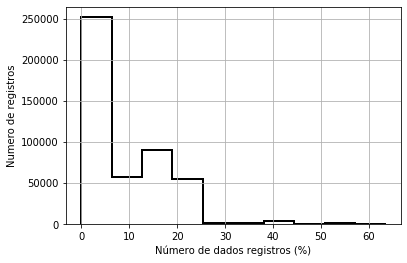

In [9]:
plt.hist(100*mkt.isnull().sum(axis=1)/mkt.shape[1],bins = 10,histtype='step',color = 'black',linewidth = 2.)
plt.xlabel('Número de dados registros (%)')
plt.ylabel('Numero de registros')
plt.grid()

#### Não é necessário remover registros

In [10]:
mkt.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_masculino,qt_socios_feminino,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,...,47.0,41.0,2.0,2.0,NaN,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,...,27.0,27.0,1.0,1.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,...,32.0,32.0,NaN,1.0,NaN,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,False,...,36.0,36.0,1.0,1.0,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,False,...,NaN,NaN,NaN,NaN,NaN,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0


### Análise exploratória com as features escolhidas

In [11]:
keys_chosen = ['id',
'fl_matriz',
'de_natureza_juridica',
'sg_uf',
'nm_meso_regiao',
'de_ramo',
'setor',
'idade_empresa_anos',
'idade_emp_cat',
'fl_st_especial',
'fl_rm',
'de_saude_tributaria',
'de_nivel_atividade',
'vl_faturamento_estimado_aux']

In [12]:
df1_filt = df1[keys_chosen]
df2_filt = df2[keys_chosen]
df3_filt = df3[keys_chosen]
mkt_filt = mkt[keys_chosen]

#### Começarei a análise por df1 e df2 visto que não possuem clientes em comum

In [13]:
mkt_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Data columns (total 14 columns):
id                             462298 non-null object
fl_matriz                      462298 non-null bool
de_natureza_juridica           462298 non-null object
sg_uf                          462298 non-null object
nm_meso_regiao                 403600 non-null object
de_ramo                        462298 non-null object
setor                          460371 non-null object
idade_empresa_anos             462298 non-null float64
idade_emp_cat                  462298 non-null object
fl_st_especial                 462298 non-null bool
fl_rm                          462298 non-null object
de_saude_tributaria            447447 non-null object
de_nivel_atividade             451130 non-null object
vl_faturamento_estimado_aux    434785 non-null float64
dtypes: bool(2), float64(2), object(10)
memory usage: 46.7+ MB


##### df1_filt.describe()

In [15]:
df2_filt.describe()

,idade_empresa_anos,vl_faturamento_estimado_aux
count,566.000000,5.660000e+02
mean,26.987691,8.104888e+07
std,11.638360,2.220549e+08
min,10.038356,1.001471e+07
25%,17.832192,1.850712e+07
50%,23.402740,3.040626e+07
75%,38.628082,6.331316e+07
max,55.126027,3.490930e+09


#### Só temos uma variável numérica. Vamos ver se conseguimos diferencias os clientes por ela

In [16]:
## rotulando os dados
df1_filt['target'] = np.ones(df1_filt.shape[0]).astype(np.int)
df2_filt['target'] = 2*np.ones(df2_filt.shape[0]).astype(np.int)
df3_filt['target'] = 3*np.ones(df3_filt.shape[0]).astype(np.int)

/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [17]:
df_filt = pd.concat([df1_filt,df2_filt,df3_filt],ignore_index=True)
df_filt.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,nm_meso_regiao,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_st_especial,fl_rm,de_saude_tributaria,de_nivel_atividade,vl_faturamento_estimado_aux,target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,PI,SUDOESTE PIAUIENSE,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,False,NAO,CINZA,BAIXA,210000.0,1
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,MA,CENTRO MARANHENSE,COMERCIO VAREJISTA,COMERCIO,6.586301,5 a 10,False,NAO,VERDE,MEDIA,210000.0,1
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,MA,NORTE MARANHENSE,COMERCIO VAREJISTA,COMERCIO,8.010959,5 a 10,False,SIM,AZUL,MEDIA,50000.0,1
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,RN,OESTE POTIGUAR,COMERCIO VAREJISTA,COMERCIO,20.863014,> 20,False,NAO,VERDE,ALTA,50000.0,1
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,LESTE POTIGUAR,COMERCIO VAREJISTA,COMERCIO,18.726027,15 a 20,False,SIM,VERDE,ALTA,3029140.8,1


/home/guilherme/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/guilherme/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


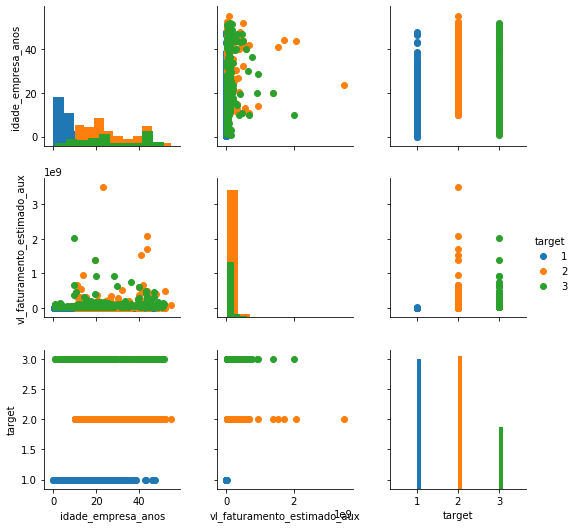

In [34]:
g=sns.PairGrid(df_filt[['idade_empresa_anos','vl_faturamento_estimado_aux','target']],hue = 'target')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

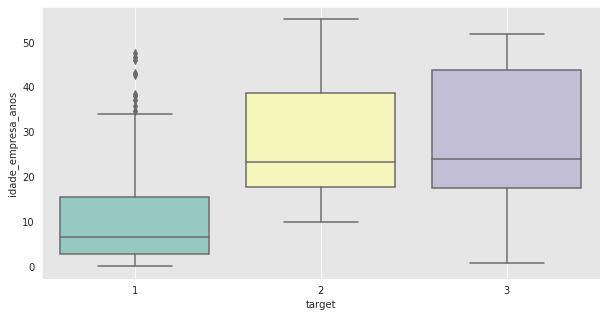

In [17]:
plt.figure(figsize = (10,5))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="target", y="idade_empresa_anos",
                 data=df_filt, palette="Set3")
plt.grid()


#### Olhando para o box plot eu diria que a diferenciação dos clientes 2 e 3 fica dificil olhando somente para variavel idade_empresa_anos. É necessário observar a influência de outras variáveis nessa análise


##### Ramo

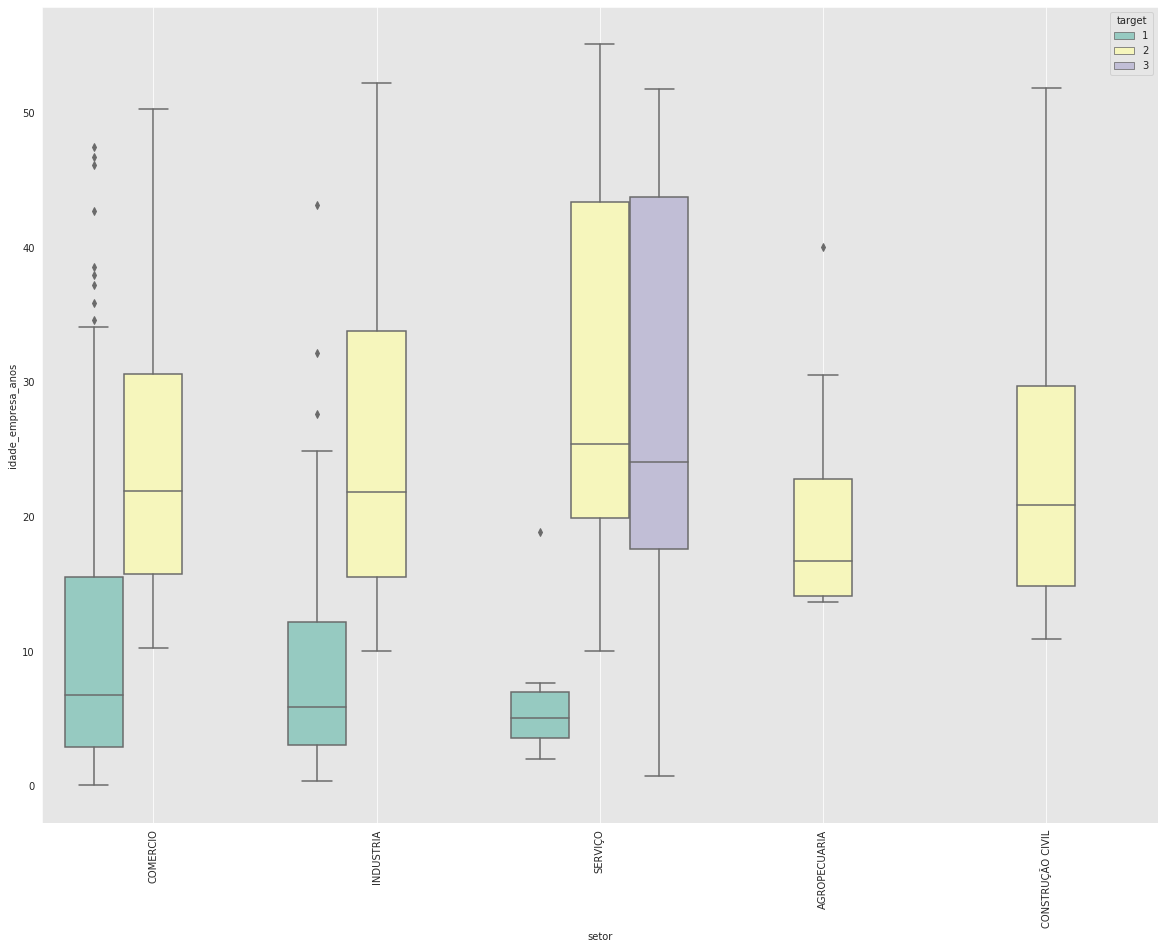

In [18]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="setor", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()

###### É possível perceber que algumas empresas atuam em determinados setores e outras não. Essa variável pode ser muito importante para criação do modelo

##### Situação especial

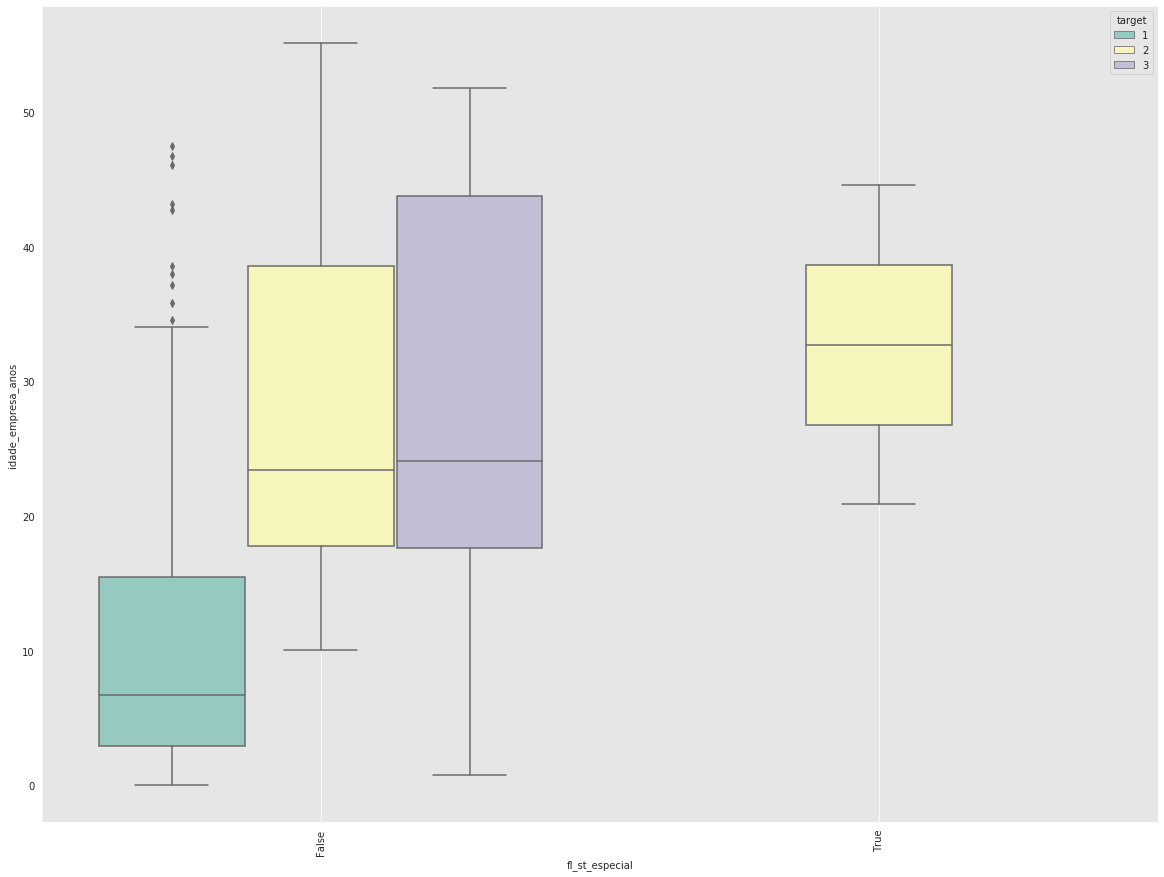

In [19]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="fl_st_especial", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()

###### Somente a empresa 2 possuí clientes com situação especial positiva, poderia também ser utilizado na diferenciação da mesma 

##### Saude tributária

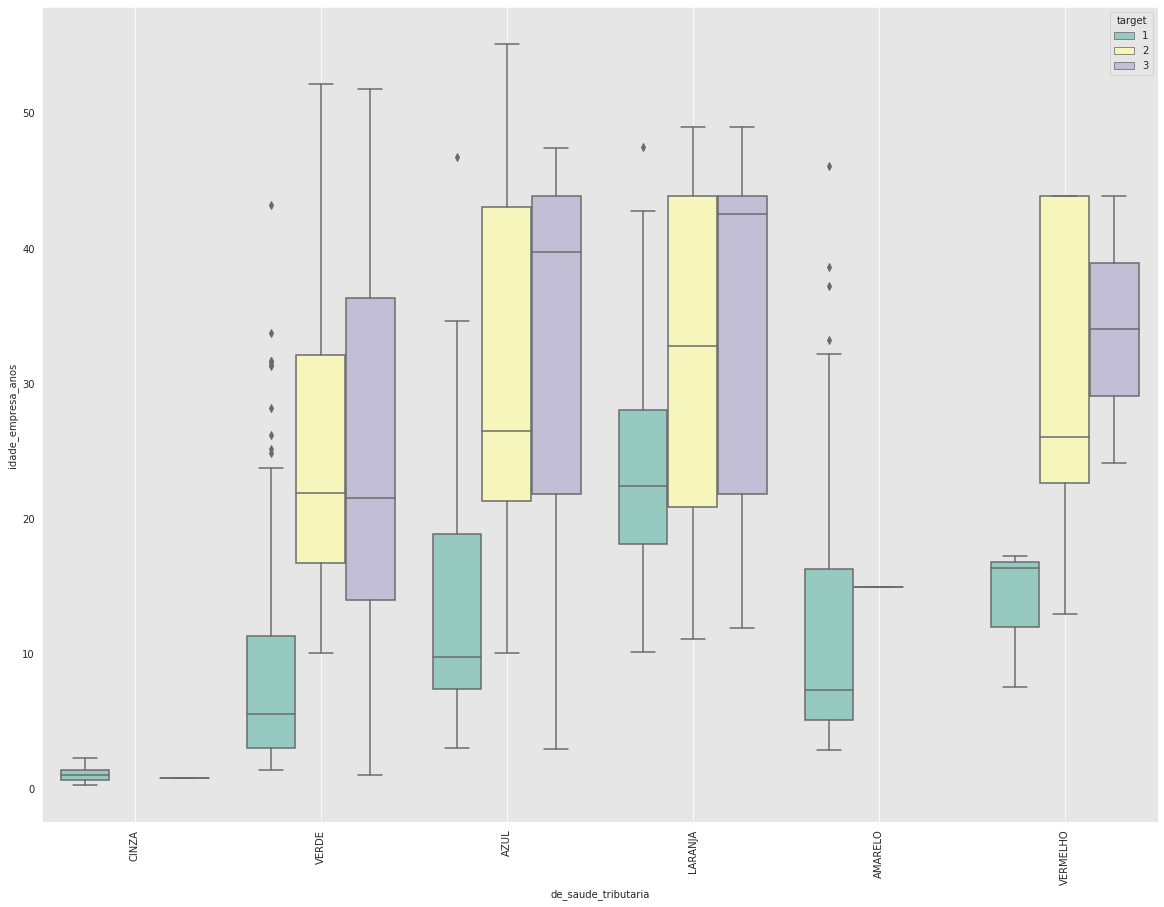

In [20]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="de_saude_tributaria", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()

###### Em alguns casos é possível destinguir o cliente 1 dos demais mas não sei ao certo se isso não seria redundante visto que pode ser feito através de outras features

#### Nivel de atividade

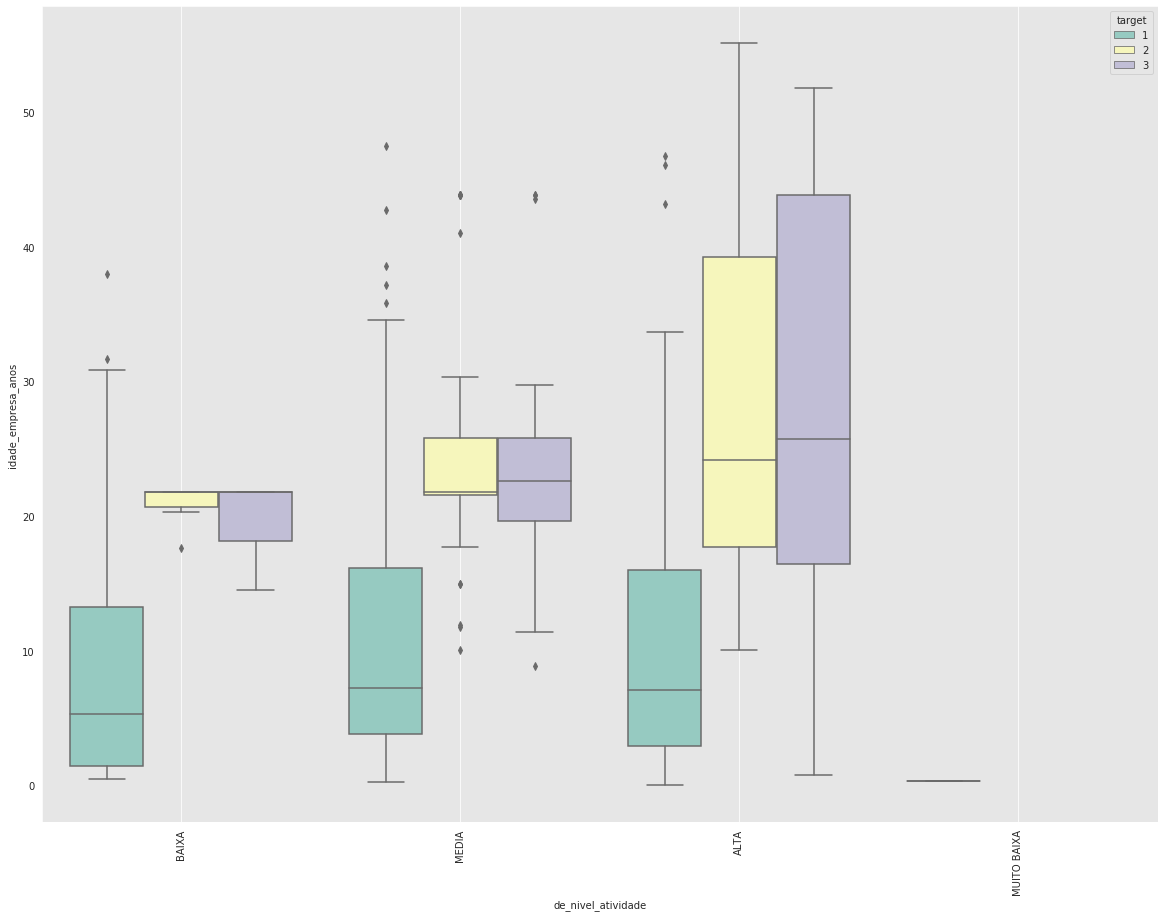

In [21]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="de_nivel_atividade", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()

###### Aqui conseguimos uma pequena diferenciação entre cliente 2 e 3 para o nivel de atividade baixo mas ainda não sei se é o que precisamos

##### Análise por regiao

In [22]:
e_regiao = {
    'AC': 'NORTE',
    'AL': 'NORDESTE',
    'AP': 'NORTE',
    'AM': 'NORTE',
    'BA': 'NORDESTE',
    'CE': 'NORDESTE',
    'DF': 'CENTRO-OESTE',
    'ES': 'SUDESTE',
    'GO': 'CENTRO-OESTE',
    'MA': 'NORDESTE',
    'MT': 'CENTRO-OESTE',
    'MS': 'CENTRO-OESTE',
    'MG': 'SUDESTE',
    'PA': 'NORTE',
    'PB': 'NORDESTE',
    'PR': 'SUL',
    'PE': 'NORDESTE',
    'PI': 'NORDESTE',
    'RJ': 'SUDESTE',
    'RN': 'NORDESTE',
    'RS': 'SUL',
    'RO': 'NORTE',
    'RR': 'NORTE',
    'SC': 'SUL',
    'SP': 'SUDESTE',
    'SE': 'NORDESTE',
    'TO': 'NORTE'
}

In [23]:
df_filt_by_region = df_filt.replace(e_regiao)

In [24]:
df_filt_by_region.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,nm_meso_regiao,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_st_especial,fl_rm,de_saude_tributaria,de_nivel_atividade,target
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...,True,EMPRESARIO INDIVIDUAL,NORDESTE,SUDOESTE PIAUIENSE,COMERCIO VAREJISTA,COMERCIO,0.646575,<= 1,False,NAO,CINZA,BAIXA,1
1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...,False,EMPRESARIO INDIVIDUAL,NORDESTE,CENTRO MARANHENSE,COMERCIO VAREJISTA,COMERCIO,6.586301,5 a 10,False,NAO,VERDE,MEDIA,1
2,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...,True,EMPRESARIO INDIVIDUAL,NORDESTE,NORTE MARANHENSE,COMERCIO VAREJISTA,COMERCIO,8.010959,5 a 10,False,SIM,AZUL,MEDIA,1
3,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...,True,EMPRESARIO INDIVIDUAL,NORDESTE,OESTE POTIGUAR,COMERCIO VAREJISTA,COMERCIO,20.863014,> 20,False,NAO,VERDE,ALTA,1
4,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...,True,SOCIEDADE EMPRESARIA LIMITADA,NORDESTE,LESTE POTIGUAR,COMERCIO VAREJISTA,COMERCIO,18.726027,15 a 20,False,SIM,VERDE,ALTA,1


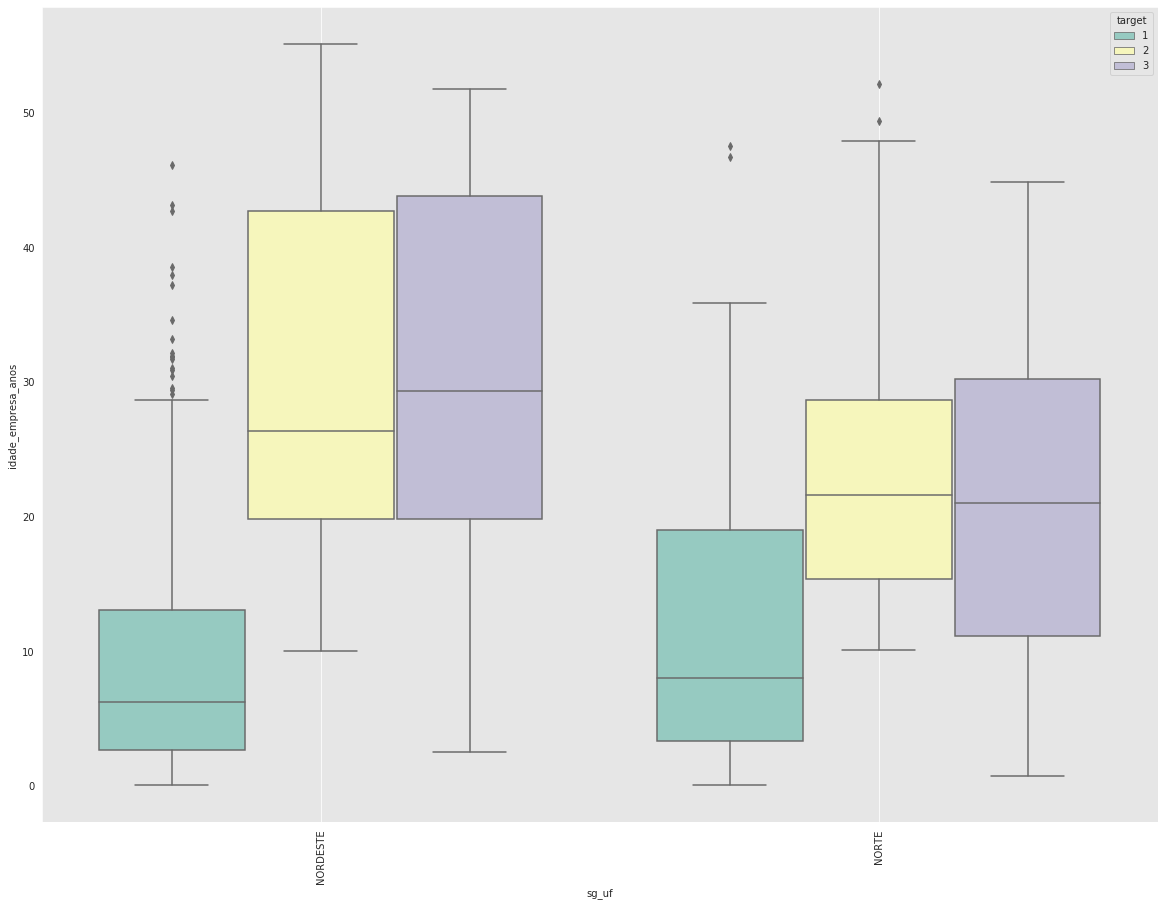

In [25]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="sg_uf", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt_by_region, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()

###### Temos só norte/nordeste

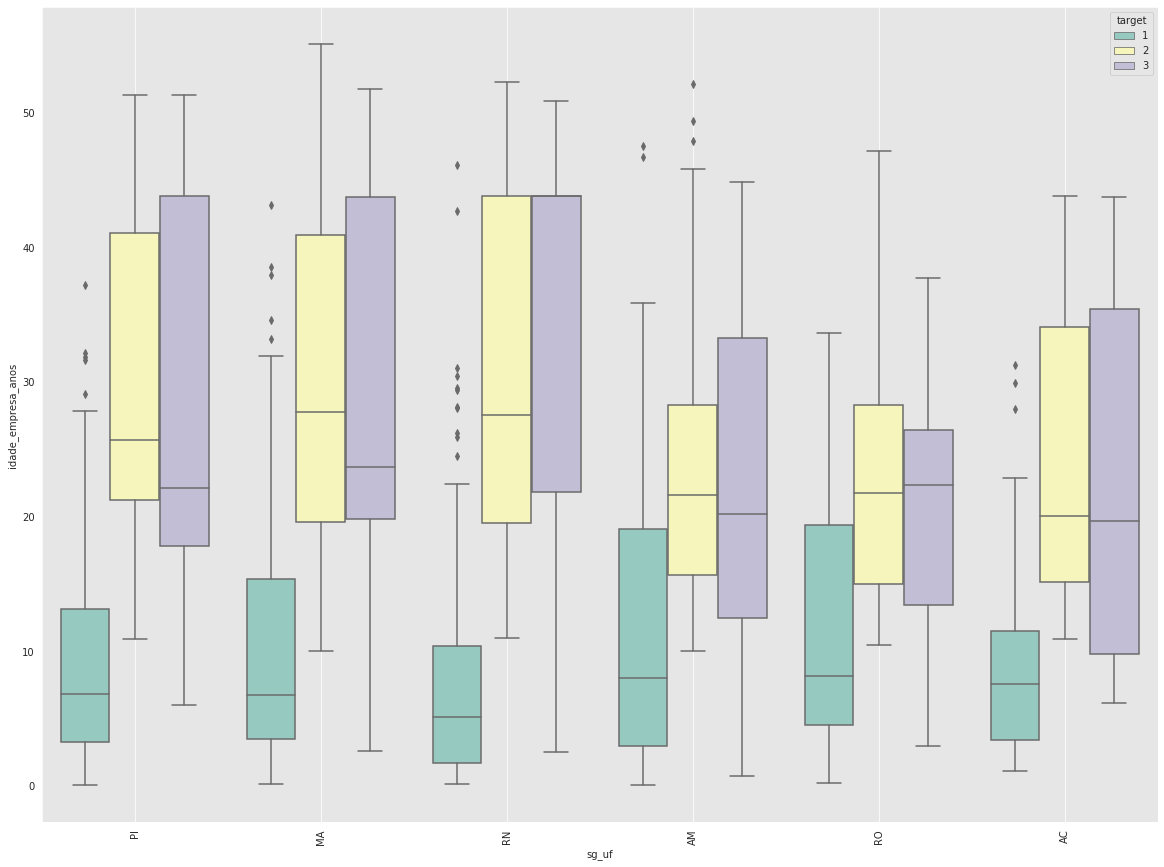

In [26]:
plt.figure(figsize = (20,15))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.boxplot(x="sg_uf", y="idade_empresa_anos",
                 hue = 'target',
                 data=df_filt, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()